# Image registration

Various types of image registration:
- translation
- rigid body (translation + rotation)
- scaled rotation (translation + rotation + scaling)
- affine (translation + rotation + scaling + shearing)
- bilinear (non-linear transformation; does not preserve straight lines)

---
There are several libraries that perform image registration:
- `image_registration`
- optical flow based image shift (part of `scikit-image` and `opencv`)
- `pystackreg` (port of the ImageJ extension) -- recommended for microscopy applications

# $\chi^2$ shift

In [24]:
from skimage import io
from image_registration import chi2_shift

import matplotlib.pyplot as plt
from scipy.ndimage import shift

import numpy as np

In [5]:
img1 = io.imread("../inpdata/images/Osteosarcoma_01.tif", as_gray=True)
img2 = io.imread("../inpdata/images/Osteosarcoma_01_transl.tif", as_gray=True)

In [7]:
noise = 0.1
xoff, yoff, exoff, eyoff = chi2_shift(img1, img2)

/home/vdsukhov/anaconda3/envs/cv-python/lib/python3.9/site-packages/image_registration/fft_tools/zoom.py:101: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  outarr[ii] = outarr_d[dims]


In [8]:
cor_img = shift(img2, shift=(xoff, yoff))

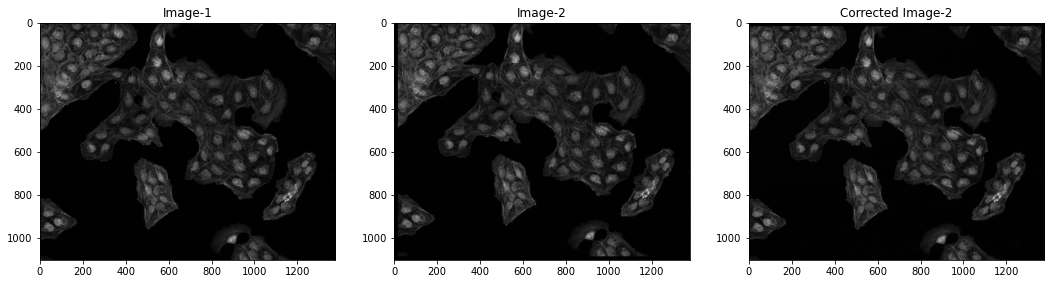

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

axs.flat[0].imshow(img1, cmap="gray")
axs.flat[0].title.set_text("Image-1")

axs.flat[1].imshow(img2, cmap="gray")
axs.flat[1].title.set_text("Image-2")

axs.flat[2].imshow(cor_img, cmap="gray")
axs.flat[2].title.set_text("Corrected Image-2")

# Cross-correlation

In [11]:
from image_registration import cross_correlation_shifts

In [15]:
xoff, yoff = cross_correlation_shifts(img1, img2)
print(f"x offset: {xoff}, y offset: {yoff}")

x offset: 18.00140750783571, y offset: -16.988641048024164


In [13]:
cor_img = shift(img2, shift=(xoff, yoff))

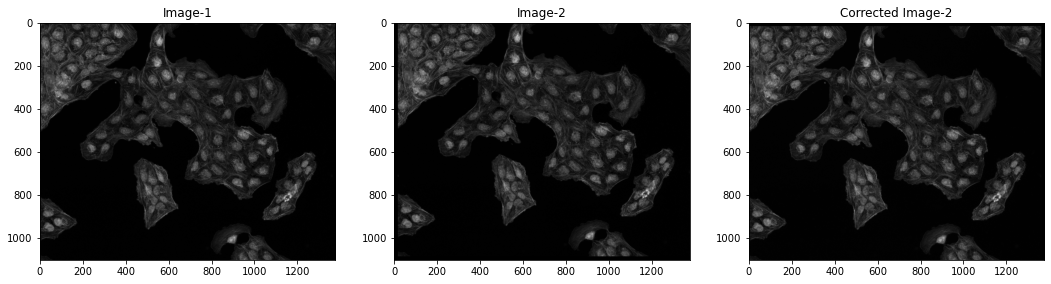

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

axs.flat[0].imshow(img1, cmap="gray")
axs.flat[0].title.set_text("Image-1")

axs.flat[1].imshow(img2, cmap="gray")
axs.flat[1].title.set_text("Image-2")

axs.flat[2].imshow(cor_img, cmap="gray")
axs.flat[2].title.set_text("Corrected Image-2")

# `optical_flow` from `skimage` package

In [17]:
from skimage.registration import optical_flow_tvl1

In [18]:
flow = optical_flow_tvl1(img1, img2)

In [28]:
xoff = np.mean(flow[1, :, :]) # along x axis
yoff = np.mean(flow[0, :, :]) # along y axis
print(f"x offset: {xoff}, y offset: {yoff}")

x offset: 18.01491355895996, y offset: -17.005634307861328


In [26]:
cor_img = shift(img2, shift=(xoff, yoff))

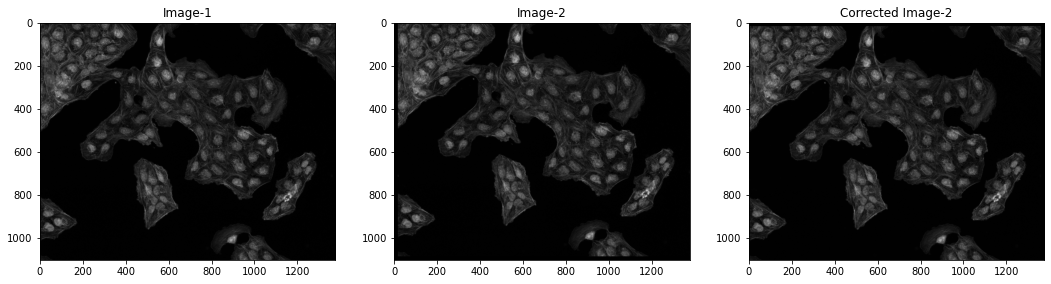

In [27]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

axs.flat[0].imshow(img1, cmap="gray")
axs.flat[0].title.set_text("Image-1")

axs.flat[1].imshow(img2, cmap="gray")
axs.flat[1].title.set_text("Image-2")

axs.flat[2].imshow(cor_img, cmap="gray")
axs.flat[2].title.set_text("Corrected Image-2")

# `pystackreg` library

In [29]:
from pystackreg import StackReg

In [30]:
sr = StackReg(StackReg.TRANSLATION) # create an operator first
sr_res = sr.register_transform(img1, img2)

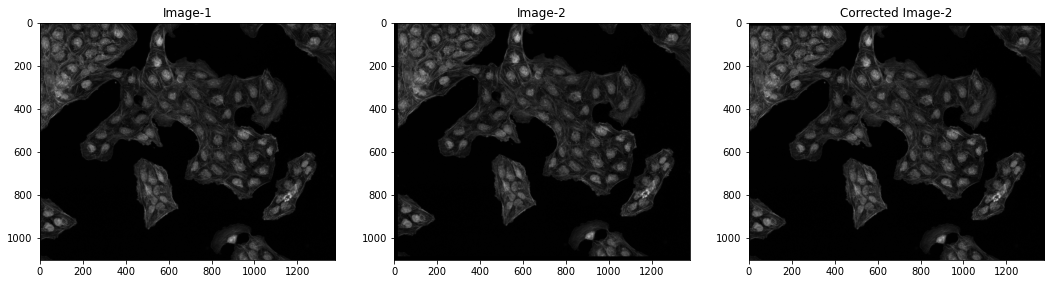

In [31]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6))

axs.flat[0].imshow(img1, cmap="gray")
axs.flat[0].title.set_text("Image-1")

axs.flat[1].imshow(img2, cmap="gray")
axs.flat[1].title.set_text("Image-2")

axs.flat[2].imshow(sr_res, cmap="gray")
axs.flat[2].title.set_text("Corrected Image-2")

There are a lot of other possible case scenarios:
- `StackReg.TRANSLATION`
- `StackReg.RIGID_BODY`
- `StackReg.AFFINE`
- `StackReg.BILINEAR`
- `StackReg.SCALED_ROTATION`

Go and read more about this library [here](https://pystackreg.readthedocs.io/en/latest/)